# <font color = '#33FF55'><b>House Price Prediction</b></font>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reading the dataset
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Checking the shape of the dataset
print(f"The shape of the dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

The shape of the dataset contains 20640 rows and 10 columns


In [4]:
# Printing the columns of the dataset
print(f"The columns of the dataset are: {df.columns}")

The columns of the dataset are: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [5]:
# Getting the short summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Getting the statistical summary of the dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Checking for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

the total_bedrooms column contains 207 missing values.

In [8]:
df.total_bedrooms.value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [9]:
207/df.shape[0]

0.01002906976744186

There are lots of values in the total_bedrooms column so we cant fill the missing values of this columns. there are only 207 missing values which is just 0.01 percent of the dataset. So we can simply drop them.

In [10]:
# Dropping the missing values
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Now there is no missing values in the dataset, so we can proceed further.

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## <font color = '#33FF55'><b>Visualizing dataset:</b></font>

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [15]:
plt.style.use('ggplot')

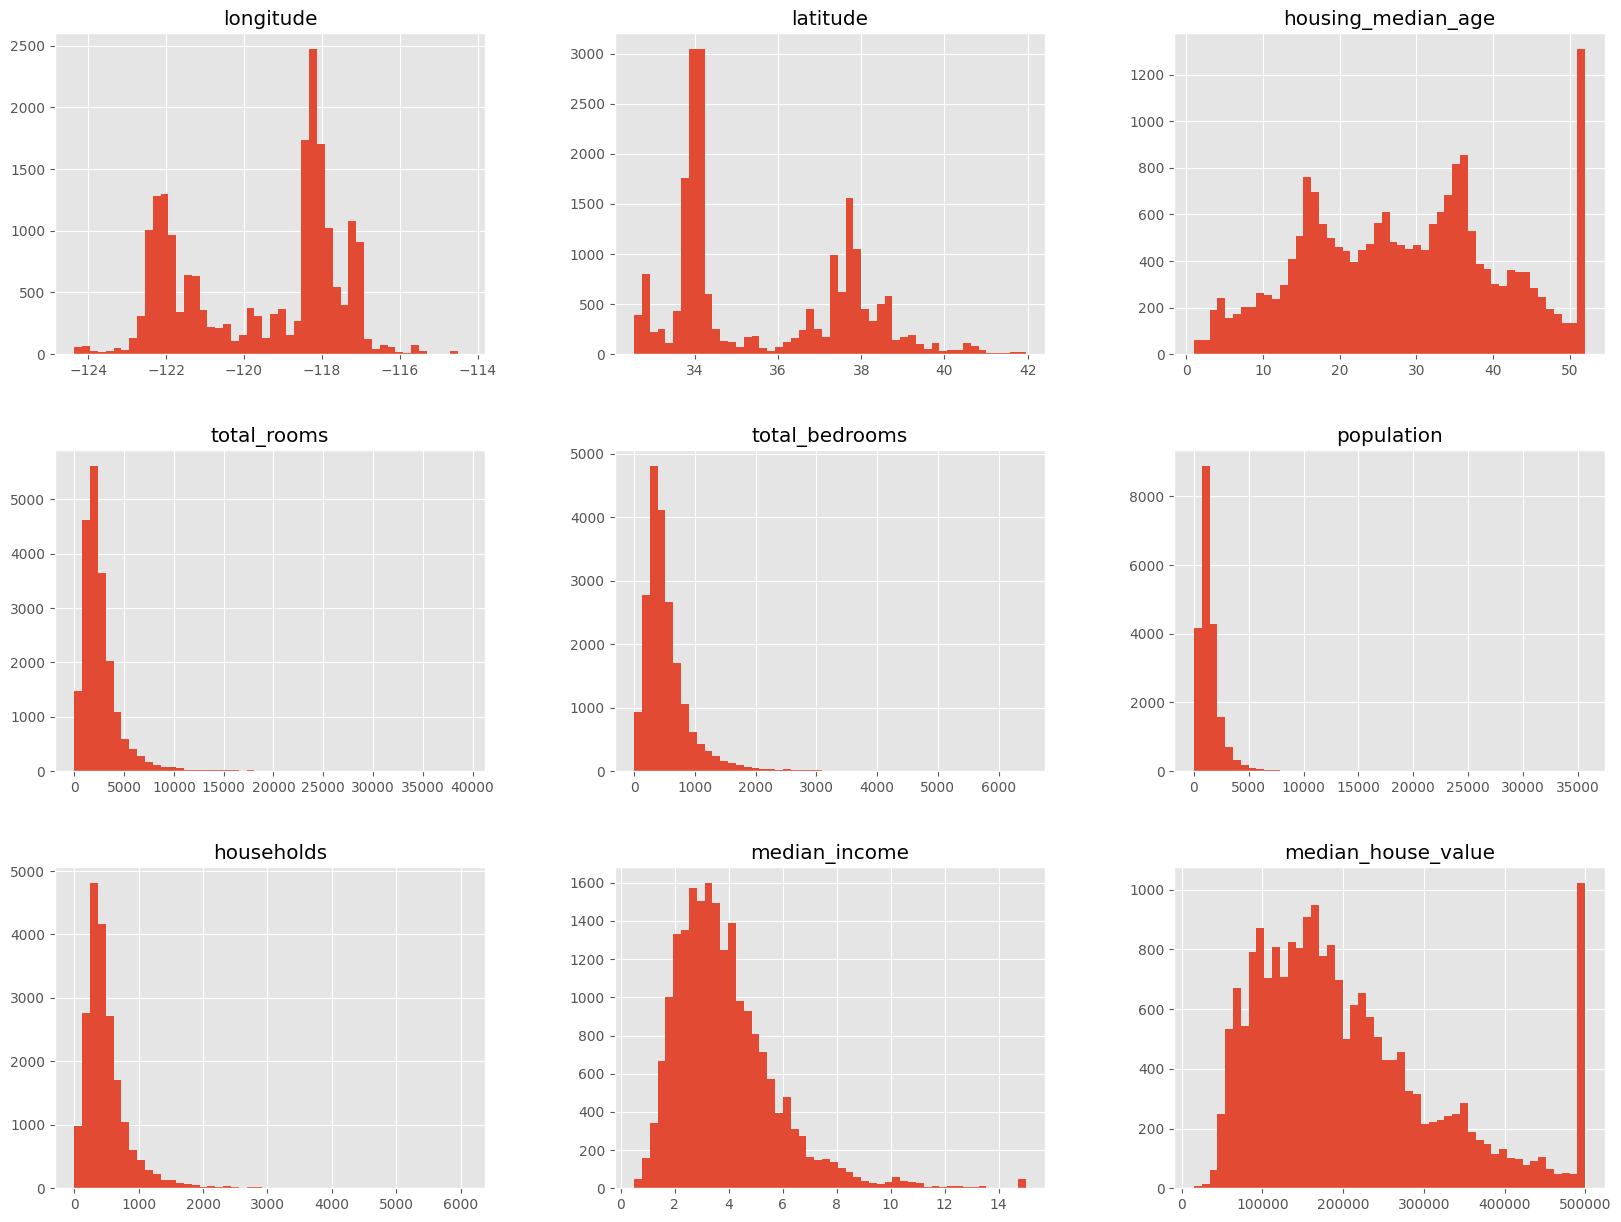

In [16]:
# Creating histograms for all the columns
df.hist(bins=50, figsize=(20,15))
plt.show()

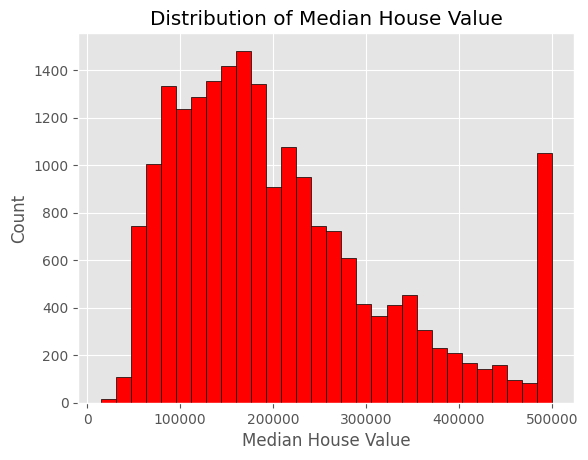

In [17]:
# Distribution of median house value
plt.hist(df['median_house_value'], bins=30, color='r', edgecolor='black')
plt.xlabel('Median House Value')
plt.ylabel('Count')
plt.title('Distribution of Median House Value')
plt.show()

Most of the median house price are in the range 80000 to 220000

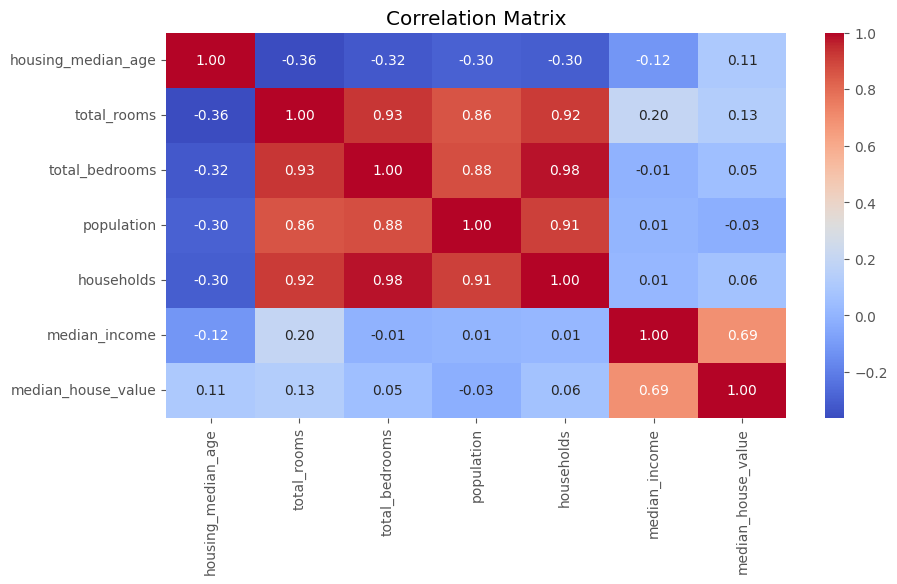

In [18]:
# Heatmap of the correlation matrix

plt.figure(figsize=(10, 5))
sns.heatmap(df.drop(["ocean_proximity", "longitude", "latitude"], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

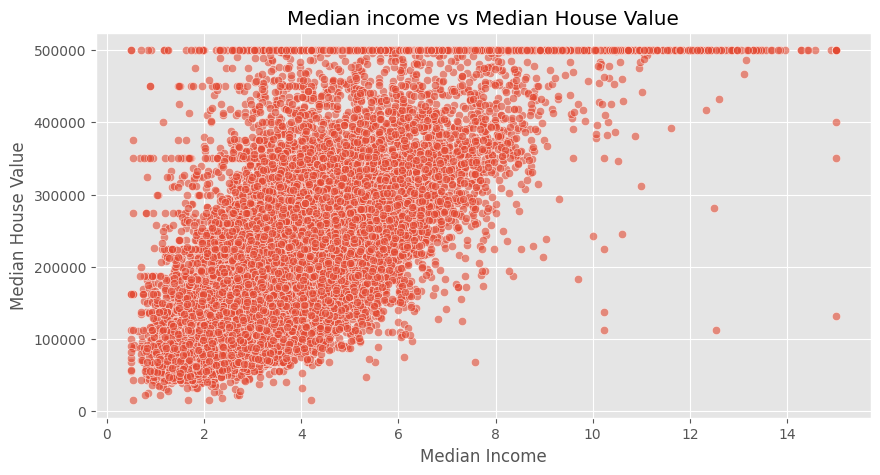

In [19]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='median_income', y = 'median_house_value', data = df, alpha = 0.6) # alpha is for transparency
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Median income vs Median House Value')
plt.show()

House Prices are continuously increasing with the increase in Median Income.

Text(0.5, 1.0, 'Latitude and Longitude vs Median House Value')

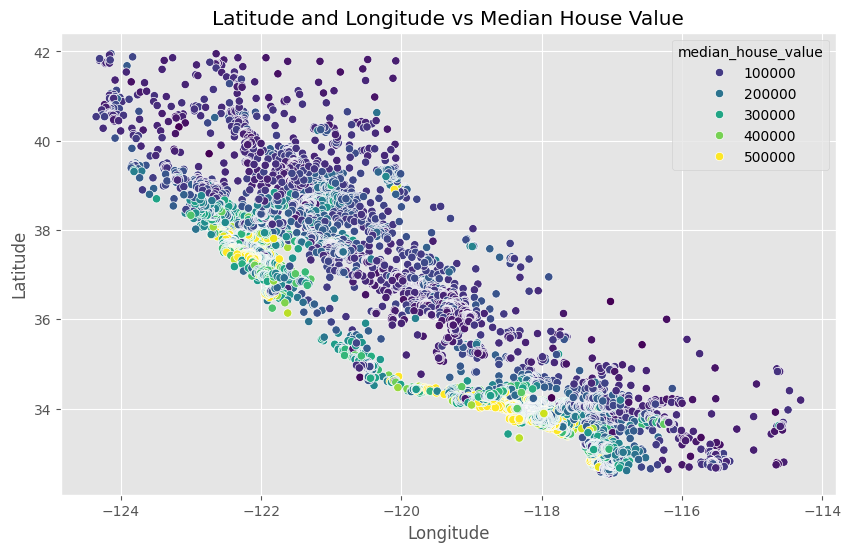

In [20]:
# Scatterplot of latitude and longitude with median house value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='median_house_value', palette='viridis', legend=True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude vs Median House Value')

In [21]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [22]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
# Encoding the categorical variable
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
# renaming the columns
df.rename(columns={'ocean_proximity_NEAR BAY': 'near_bay', 
                   'ocean_proximity_NEAR OCEAN': 'near_ocean', 
                   'ocean_proximity_<1H OCEAN': 'less_than_1h_ocean', 
                   'ocean_proximity_INLAND': 'inland', 
                   'ocean_proximity_ISLAND':'island'}, 
          inplace=True)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,inland,island,near_bay,near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [24]:
# droping latitude and longitude

df.drop(['latitude', 'longitude'], axis=1, inplace=True)

In [25]:
df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,inland,island,near_bay,near_ocean
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [26]:
# Splitting the dataset into features and target variable
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
model1 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ]
)

In [30]:
model1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('linear', LinearRegression())])

In [31]:
y_pred1 = model1.predict(X_test)

In [32]:
mse1 = mean_squared_error(y_test, y_pred1)
r2_s1 = r2_score(y_test, y_pred1)
print(f"Accuracy of the model with Degree = 2")
print(f"Mean Squared Error: {mse1}")
print(f"R2 Score: {r2_s1}")

Accuracy of the model with Degree = 2
Mean Squared Error: 5.98242562840255e+21
R2 Score: -437465926190.32104


Degree = 3

In [33]:
model2 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression())
    ]
)

In [34]:
model2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [35]:
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
r2_s2 = r2_score(y_test, y_pred2)
print(f"Accuracy of the model with Degree = 3")
print(f"Mean Squared Error: {mse2}")
print(f"R2 Score: {r2_s2}")

Accuracy of the model with Degree = 3
Mean Squared Error: 4014591052.7663264
R2 Score: 0.7064323232302728


In [36]:
X_train.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'inland', 'island', 'near_bay',
       'near_ocean'],
      dtype='object')

In [37]:
# Function to predict the house price, on user input data

def predict_house_price(model):
    housing_median_age = int(input('Enter the housing median age: '))
    total_rooms = int(input('Enter the total rooms: '))
    total_bedrooms = int(input('Enter the total bedrooms: '))
    population = int(input('Enter the population: '))
    households = int(input('Enter the households: '))
    median_income = int(input('Enter the median income: '))
    
    print('What is the Ocean Proximity?')
    print('1. Near Bay')
    print('2. Near Ocean')
    print('3. Inland')
    print('4. Island')
    print('0. Less than 1h Ocean')
    print('Enter the number corresponding to the Ocean Proximity')
    ocean_proximity = int(input('Enter the Ocean Proximity: '))
    
    if ocean_proximity == 1:
        near_bay = 1
        near_ocean = 0
        inland = 0
        island = 0
    elif ocean_proximity == 2:
        near_bay = 0
        near_ocean = 1
        inland = 0
        island = 0
    elif ocean_proximity == 3:
        near_bay = 0
        near_ocean = 0
        inland = 1
        island = 0
    elif ocean_proximity == 4:
        near_bay = 0
        near_ocean = 0
        inland = 0
        island = 1
    else:
        near_bay = 0
        near_ocean = 0
        inland = 0
        island = 0
        
    data = {'housing_median_age': housing_median_age, 'total_rooms': total_rooms, 'total_bedrooms': total_bedrooms, 'population': population, 'households': households, 'median_income': median_income, 'inland': inland, 'island': island, 'near_bay': near_bay, 'near_ocean': near_ocean}
    
    data = pd.DataFrame(data, index=[0])
    
    return model.predict(data)

# print(f"The price of the house is {predict_house_price(model2)}")
    